<a href="https://colab.research.google.com/github/sedanurozer/cifar10/blob/main/VGG_16overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import BatchNormalization, DepthwiseConv2D
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

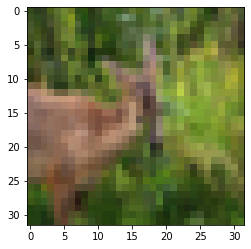

In [7]:
plt.imshow(x_test[580])

In [8]:
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [10]:
model_train= model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 77s 28ms/step - loss: 2.3352 - sparse_categorical_accuracy: 0.0982
Epoch 2/20
1563/1563 [==============================] - 43s 28ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0992
Epoch 3/20
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0985
Epoch 4/20
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0999
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0997
Epoch 6/20
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0983
Epoch 7/20
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1014
Epoch 8/20
1563/1563 [==============================] - 43s 27ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1005
Epoch 9/20
1563/

In [11]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

In [12]:
print('Test loss:', test_eval[0])
print('Test accuracy: %',test_eval[1]*100)

Test loss: 2.3025946617126465
Test accuracy: % 10.003002732992172


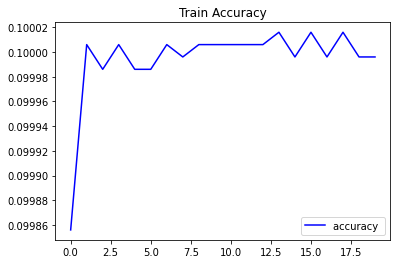

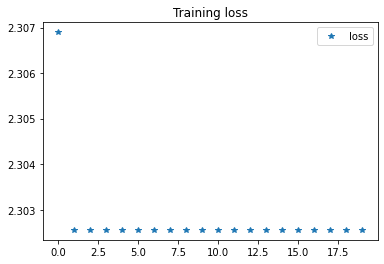

In [14]:
accuracy = model_train.history['sparse_categorical_accuracy']
loss = model_train.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy, 'b', label='accuracy ')
plt.title('Train Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*', label='loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()